# Augmentation Exploration

In [1]:
from tsaug import AddNoise, Dropout, TimeWarp, Reverse, Resize, Convolve, Drift, Pool
import numpy as np
import math
import matplotlib.pyplot as plt

from bokeh.plotting import figure, output_file, show
from bokeh.palettes import Category20

from data_generator.batch_generator_params import BatchGeneratorParams
from data_generator.batch_generator import BatchGenerator

from data_generator.data_augmenter import DataAugmenter

plt.rcParams["figure.figsize"] = (20,6)

In [2]:
params = BatchGeneratorParams.tune_train_normalized_v2
bg = BatchGenerator(**params)
#bg.augmenter = DataAugmenter.get_custom(noise_scale=0.00, seed=42,convolve_window_type='bartlett',convolve_window_size=20)
SEED = 60

X,Y = bg.__getitem__(1)

x = X[0][0:60]


2022-05-31 18:28:02.728324   [BatchGenerator] Started initialization ...
2022-05-31 18:28:02.728324   [BatchGenerator] Parsing and verifying index C:\Informatik\workspaces\workspace_python\AI-Cup\data\split_indices\csv_index_normalized_v2_train.txt
2022-05-31 18:28:02.810315   [BatchGenerator] Found 765 data files.
2022-05-31 18:28:02.811318   [BatchGenerator] Found existing version of table in C:\Informatik\workspaces\workspace_python\AI-Cup\data\tables\csv_index_normalized_v2_train_table.pkl
2022-05-31 18:28:02.811318   [BatchGenerator] Found existing meta data file in C:\Informatik\workspaces\workspace_python\AI-Cup\data\split_indices\tune_train_normalized_v2_meta.json
2022-05-31 18:28:02.817318   [BatchGenerator] Existing meta data file matches current BatchGenerator parameters.
2022-05-31 18:28:02.842316   [BatchGenerator] Found and loaded current version of table indicating 4212 samples across 765 files in C:\Informatik\workspaces\workspace_python\AI-Cup\data\tables\csv_index_nor

In [3]:
def plt_aug(x,x_aug):
    plt.clf()
    x_plots = plt.plot(x)
    aug_plots = plt.plot(x_aug)

    colors = ["FF0000","800000","808000","008000","00FFFF","008080","0000FF","FF00FF","800080","8B4500","71C671","8B864E","2E8B57","00688B","BA55D3","B0171F",]
    i = 0
    for x_plot in x_plots:
        x_plot.set(color="#"+colors[i]+ "90")
        i += 1

    i = 0
    for aug_plot in aug_plots:
        aug_plot.set(color="#"+colors[i]+ "FF")
        i += 1

    plt.show()

# Noise

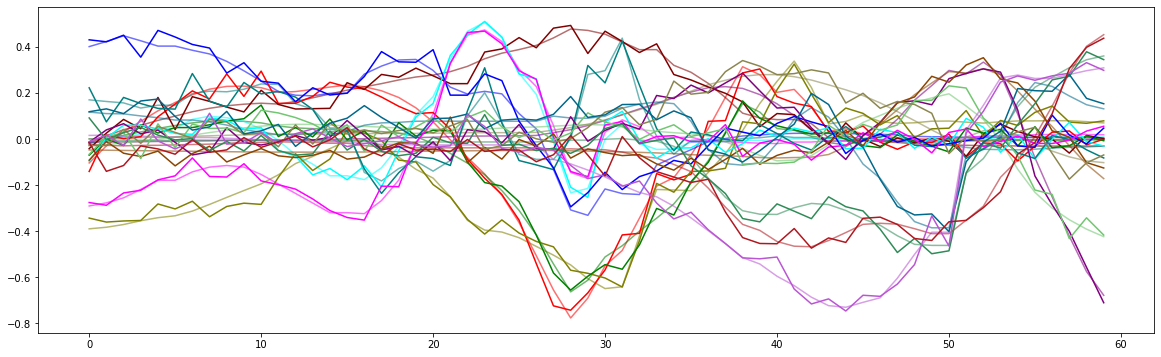

In [4]:
x_cp = np.copy(x)
aug = (AddNoise(loc=0, scale=0.04, distr='gaussian', kind='additive', per_channel=False, normalize=False, prob=1.0, seed=SEED))
x_aug = aug.augment(x_cp)
plt_aug(x,x_aug)

# Dropout

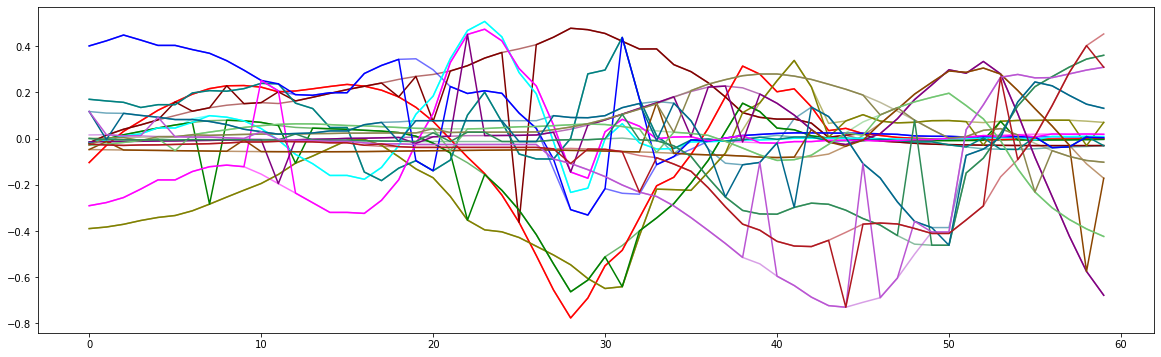

In [5]:
x_cp = np.copy(x)

aug = (Dropout(p=0.1, per_channel=False, size=1))
x_aug = aug.augment(x_cp)
plt_aug(x, x_aug)

# Drift

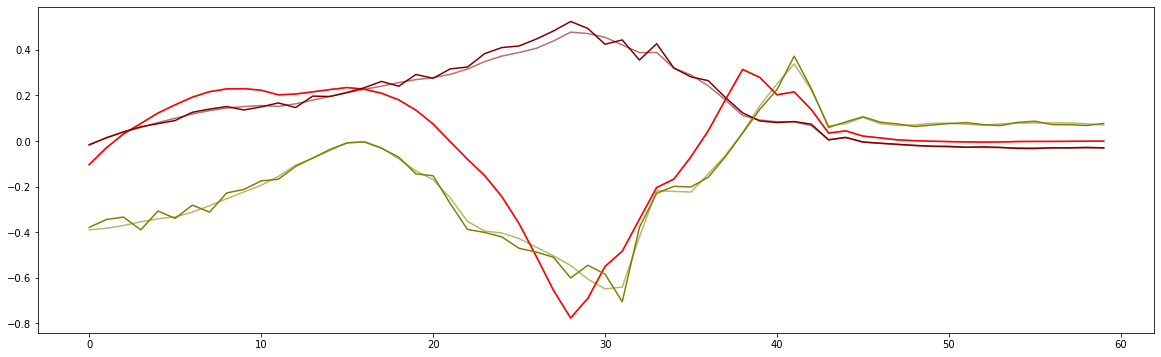

(60, 16)


In [19]:
# kind: additive, multiplicative
x_cp = np.copy(x)
aug = (Drift(max_drift=0.1, n_drift_points=100,seed=None,per_channel=True,kind='multiplicative',prob = 1.0))
x_aug = aug.augment(x_cp[:,:3])
plt_aug(x[:,:3],x_aug)

print(x_cp.shape)


# TimeWarp

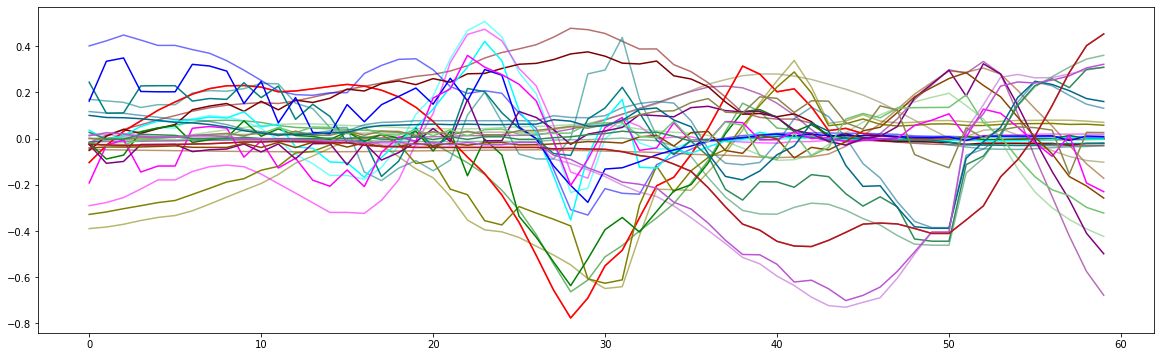

In [7]:
x_cp = np.copy(x)
aug = (TimeWarp(n_speed_change=1, max_speed_ratio=1.1))
x_aug = aug.augment(x_cp)
plt_aug(x_cp,x_aug)

# Pool

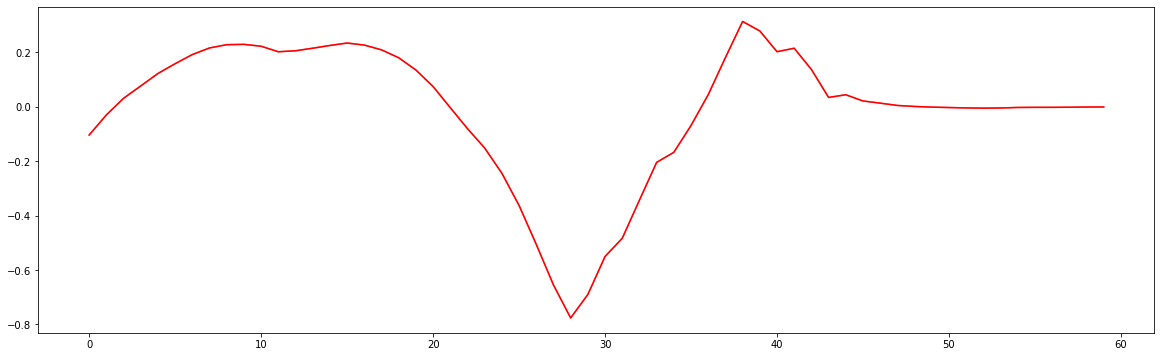

In [8]:
x_cp = np.copy(x)
aug = (Pool(kind='ave',size=1))
x_aug = aug.augment(x_cp[:,:1])
plt_aug(x_cp[:,:1],x_aug)

# Convolutions

c:\Users\paulr\.virtualenvs\src-d8jxIkDS\lib\site-packages\tsaug\_augmenter\convolve.py:200: RuntimeWarning: invalid value encountered in true_divide
  convolve1d(


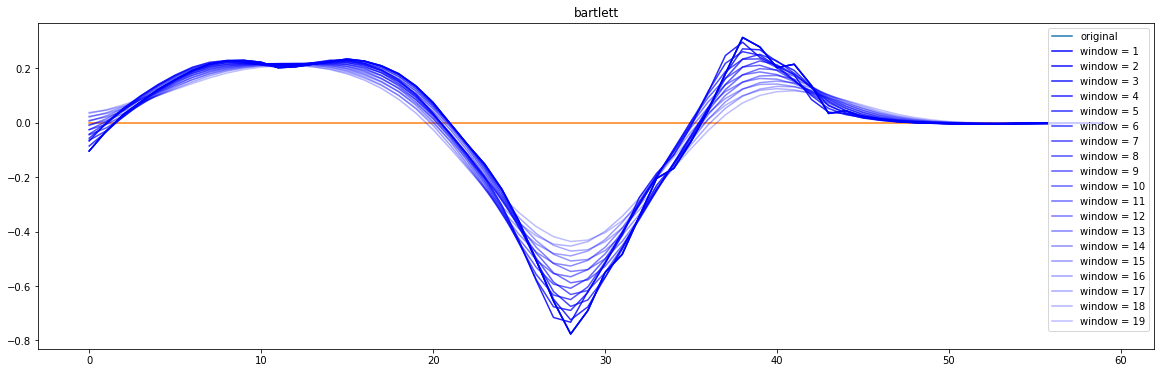

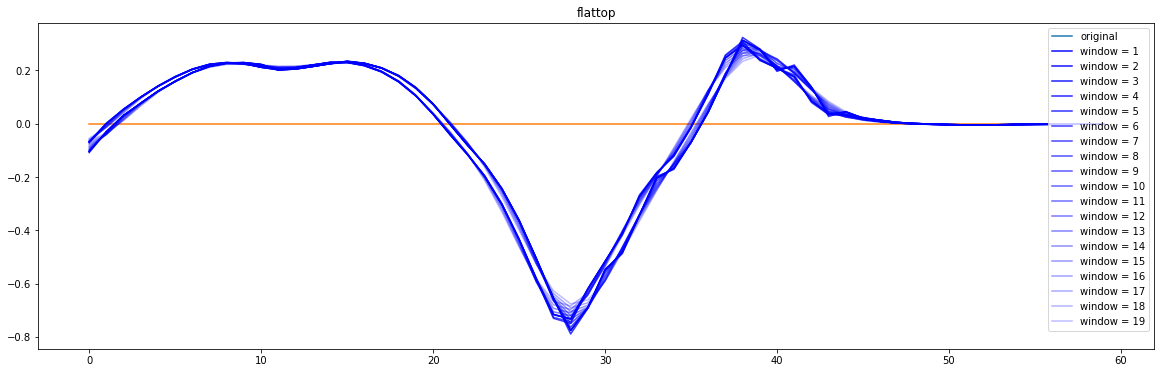

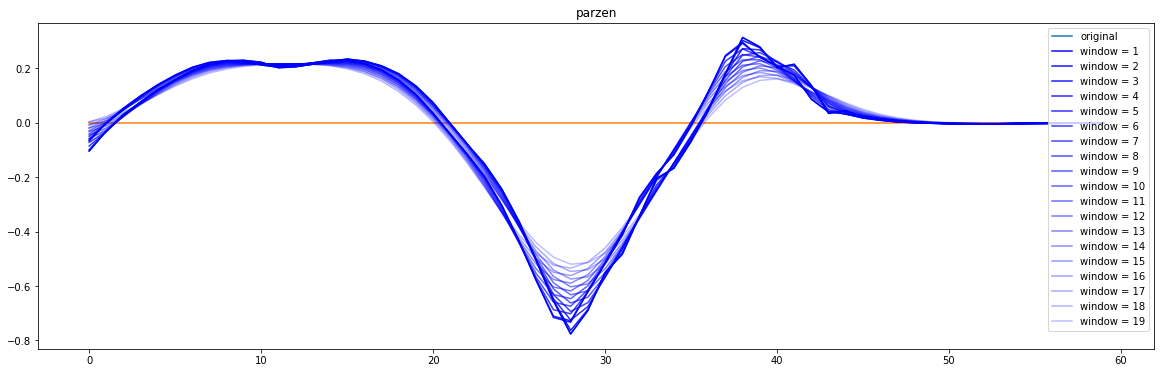

c:\Users\paulr\.virtualenvs\src-d8jxIkDS\lib\site-packages\tsaug\_augmenter\convolve.py:200: RuntimeWarning: invalid value encountered in true_divide
  convolve1d(


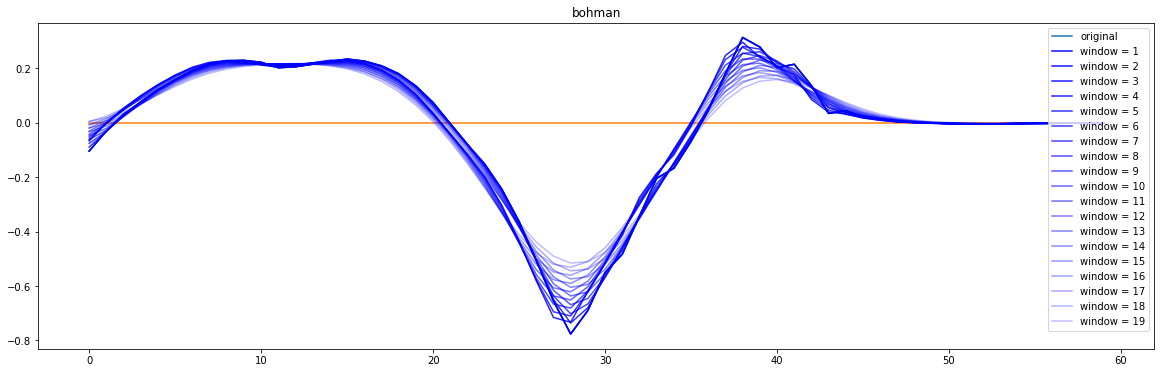

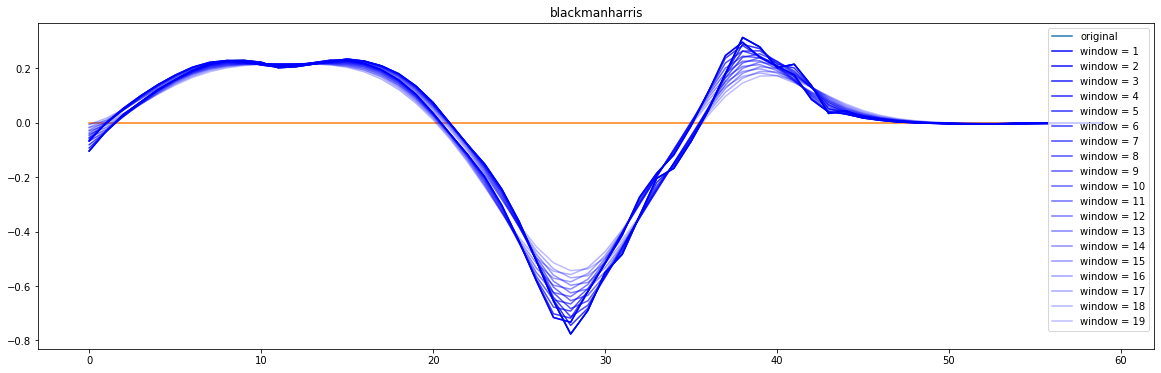

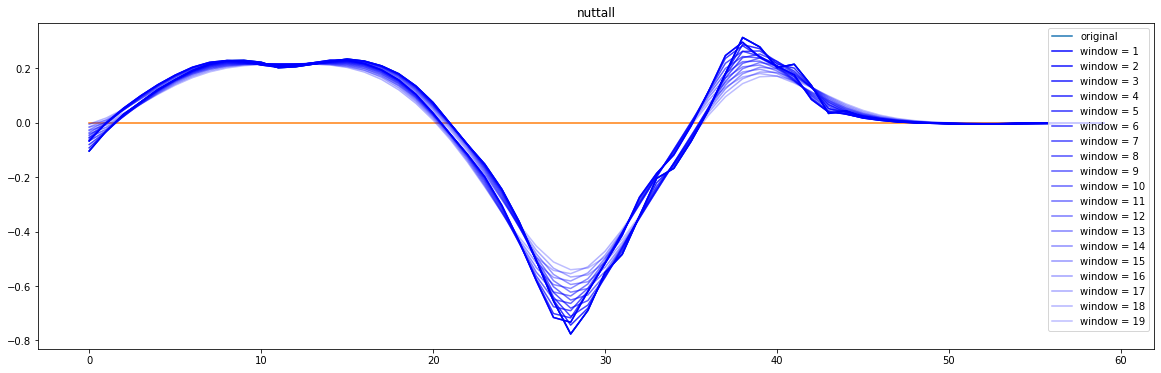

c:\Users\paulr\.virtualenvs\src-d8jxIkDS\lib\site-packages\tsaug\_augmenter\convolve.py:200: RuntimeWarning: invalid value encountered in true_divide
  convolve1d(


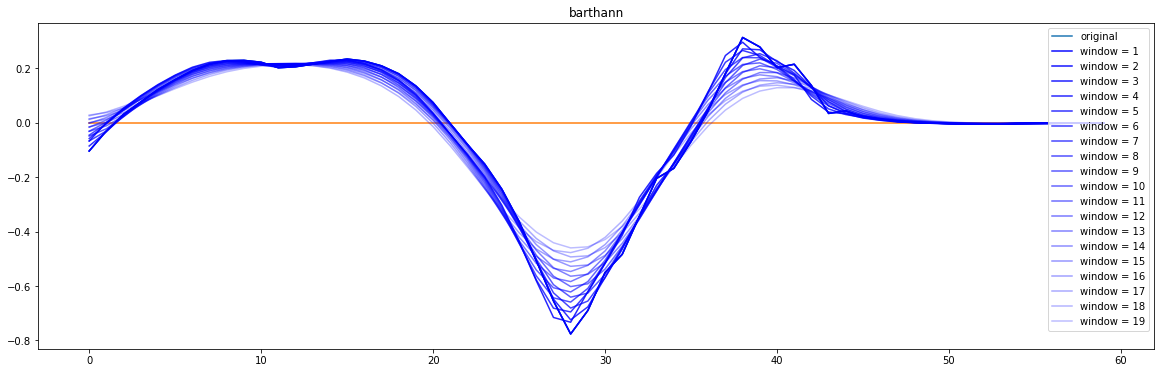

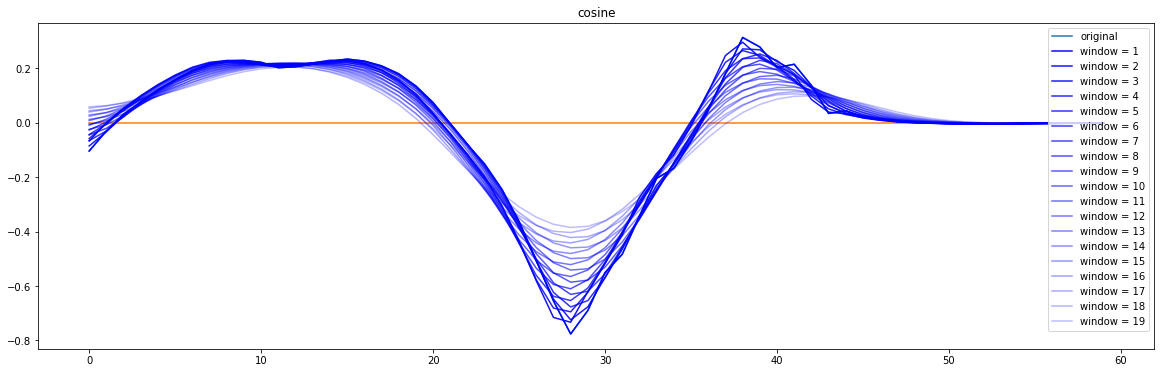

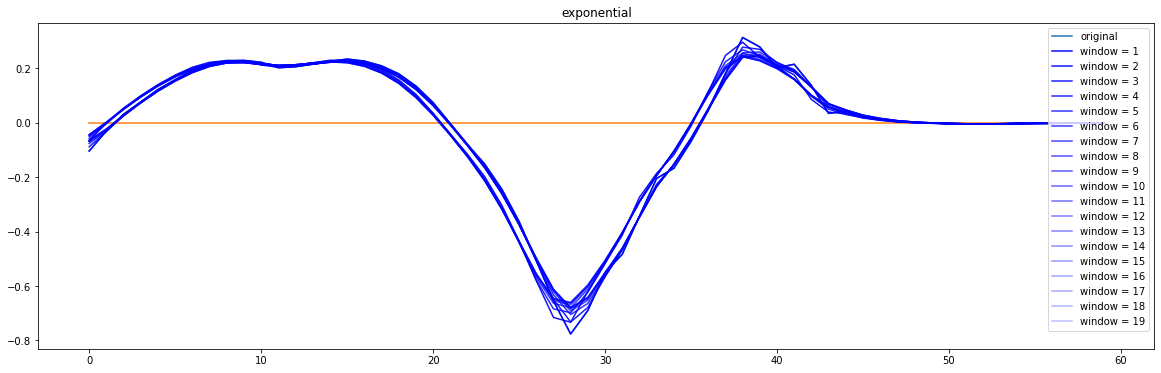

c:\Users\paulr\.virtualenvs\src-d8jxIkDS\lib\site-packages\tsaug\_augmenter\convolve.py:200: RuntimeWarning: invalid value encountered in true_divide
  convolve1d(


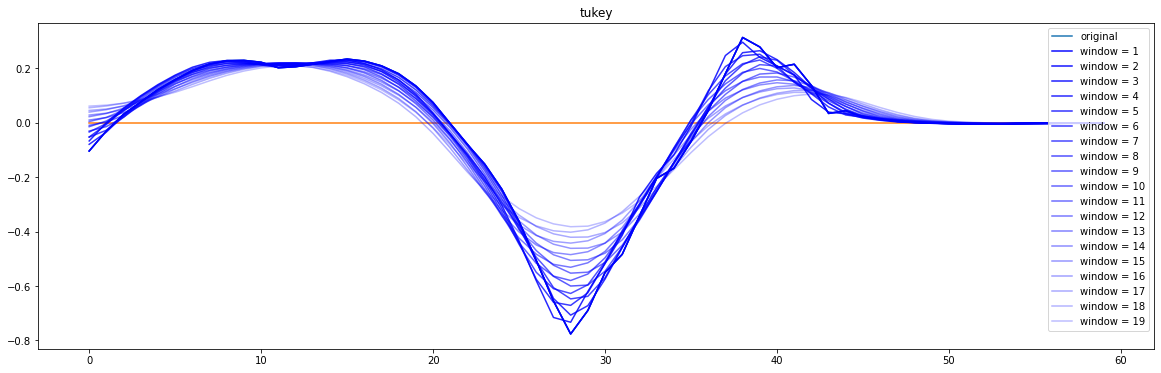

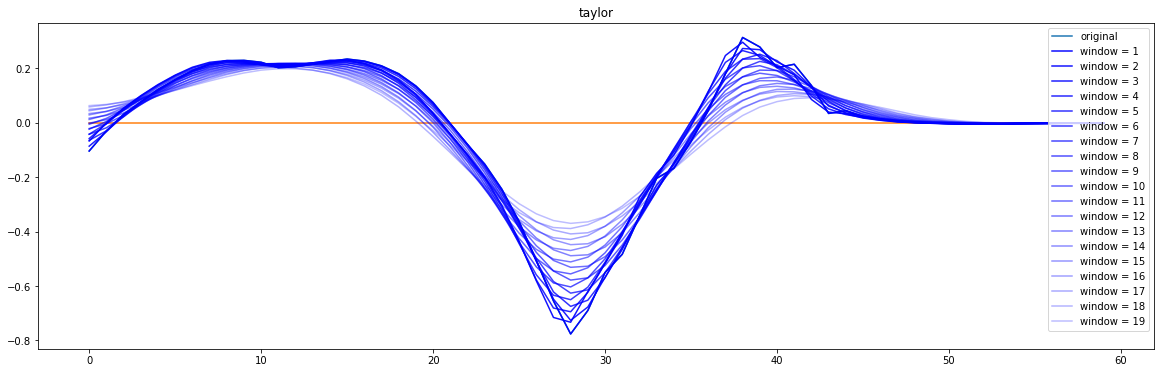

'\nfor filter in filter_list:\n    aug = (Convolve(window=filter, size=2))\n    x_aug = aug.augment(x)\n    plt_aug(x,x_aug)\n'

In [9]:
x0 = np.copy(x[:,0])
filter_str = "bartlett,flattop,parzen,bohman,blackmanharris,nuttall,barthann,cosine,exponential,tukey,taylor"
filter_list = filter_str.split(",")

max = 20
for filter in filter_list:

    plt.plot(x0,label='original')
    plt.plot([0] * len(x0))

    for i in range(1,max,1):
        aug = (Convolve(window=filter, size=i))
        x_aug = aug.augment(x0)
        plots = plt.plot(x_aug,label='window = ' + str(i))

        for plot in plots:
            alpha = format(256 - round(200 / max * i + 0), '02x')
            plot.set(color="#0000FF" + alpha)

    plt.title(filter)
    plt.legend()
    plt.show()



"""
for filter in filter_list:
    aug = (Convolve(window=filter, size=2))
    x_aug = aug.augment(x)
    plt_aug(x,x_aug)
"""